**Credit Score Classification**




In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action  ='ignore', category = FutureWarning)

In [3]:
pd.options.mode.copy_on_write = True

In [4]:
# loading the dataset and saving it as df
df = pd.read_csv('/content/credit (1).csv')


In [5]:
#copying and saving the dataset as df inorder to retain the original dataset
data= df.copy()


**The Purpose of the Project**

This project focuses on credit classification. The main objective is to develop a predictive model to categorize credit applicants into different risk levels. By analyzing various features and historical data of applicants, the model aims to assist financial institutions in evaluating credit applications more effectively. The classification goal is to categorize credit scores into three main groups: Standard, Poor, and Good. The project aims to improve the efficiency and accuracy of the credit approval process, reduce default risks, and optimize the overall credit management strategy.


###**Data Description**

The dataset contains 28 columns

**1.ID:** Unique identifier for each record.

**2.Customer_ID:** Unique identifier for each customer.

**3.Month:** Month of the record.

**4.Name:** Customer's name.

**5.Age:** Customer's age.

**6.SSN:** Customer's Social Security Number.

**7.Occupation:** Customer's occupation.

**8.Annual_Income:** Customer's annual income.

**9.Monthly_Inhand_Salary:** Customer's Net monthly income.

**10.Num_Bank_Accounts:** Number of bank accounts the customer holds.

**11.Num_Credit_Card:** Number of credit cards the customer holds.

**12.Interest_Rate:** Interest rate on the customer's credit.

**13.Num_of_Loan:** Number of loans the customer has taken.

**14.Type_of_Loan:** Types of loans the customer has taken.

**15.Delay_from_due_date:** Number of days delayed from the due date.

**16.Num_of_Delayed_Payment:** Number of delayed payments.

**17.Changed_Credit_Limit:** Amount by which the credit limit has changed.

**18.Num_Credit_Inquiries:** Number of credit inquiries made by the customers.

**19.Credit_Mix:** Mix of credit types (e.g., Good, Standard, Bad).

**20.Outstanding_Debt:** Outstanding debt amount.

**21.Credit_Utilization_Ratio:** Ratio of credit utilized.

**22.Credit_History_Age:** Age of the credit history.

**23.Payment_of_Min_Amount:** Whether the customer pays the minimum amount (Yes/No).

**24.Total_EMI_per_month:** Total EMI paid by the customer.

**25.Amount_invested_monthly:** Amount invested monthly by the customer.

**26.Payment_Behaviour:** Customer's payment behavior.

**27.Monthly_Balance:** Monthly balance in the customer's financial accounts.

**28.Credit_Score:** Credit score category (e.g., Good, Standard, Bad).


## **Data Understanding**

In [6]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [7]:
# displays the column names
data.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
data.shape

(100000, 28)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [10]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

float64    18
object      7
int64       3
Name: count, dtype: int64

In [11]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


## **Exploratory Data Analysis**


### **Credit_Score- target column analysis**


In [12]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

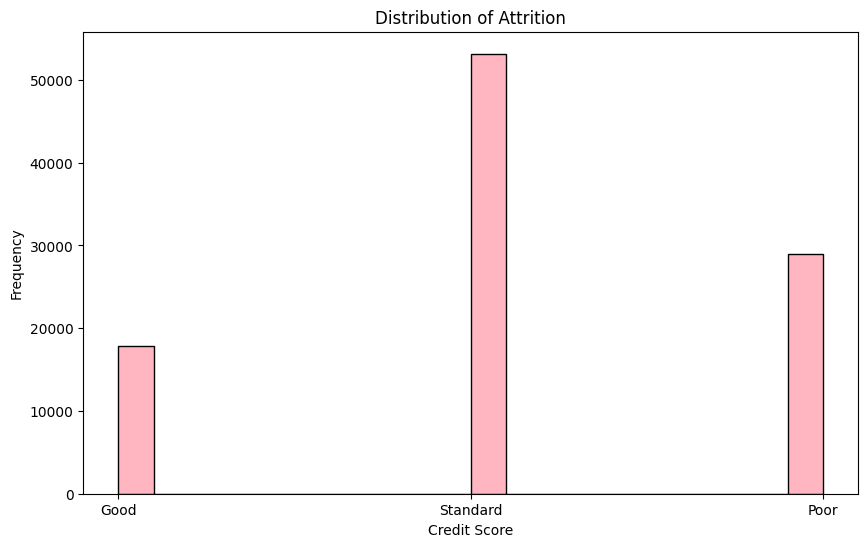

In [13]:
# Plotting Attrition
Credit = data['Credit_Score']

plt.figure(figsize = (10, 6))
plt.hist(Credit, bins = 20, color = 'lightpink', edgecolor = 'black')
plt.title('Distribution of Attrition')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

###**Univariant Analysis**


**Categorical Features**

In [14]:
# Filter categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Display the categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


**Distribution of Top 20 Type of Loan**

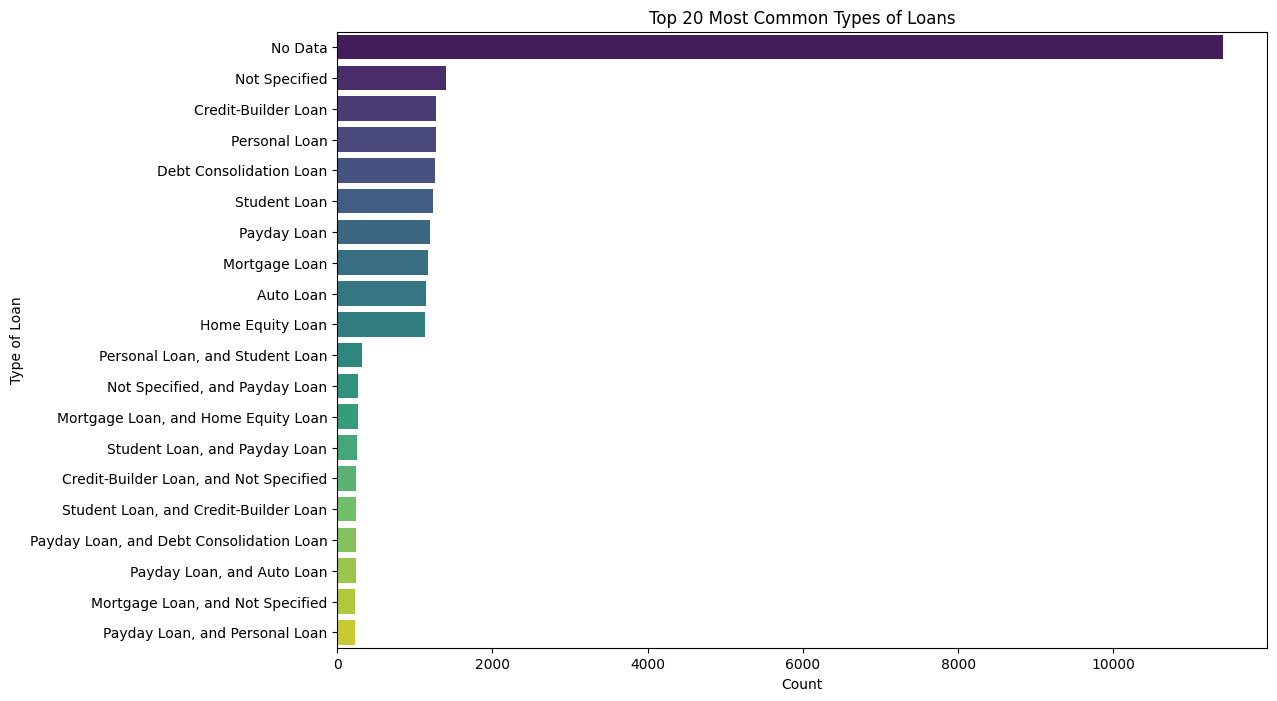

In [15]:
#Count the occurrences of each type of loan
loan_counts = data['Type_of_Loan'].value_counts()

#Sort the types of loans by their count in descending order
sorted_loan_counts = loan_counts.sort_values(ascending=False)

#Select the top 20 types
top_20_loans = sorted_loan_counts.head(20)

# Step 4: Visualize the distribution using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_loans.values, y=top_20_loans.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Type of Loan')
plt.title('Top 20 Most Common Types of Loans')
plt.show()


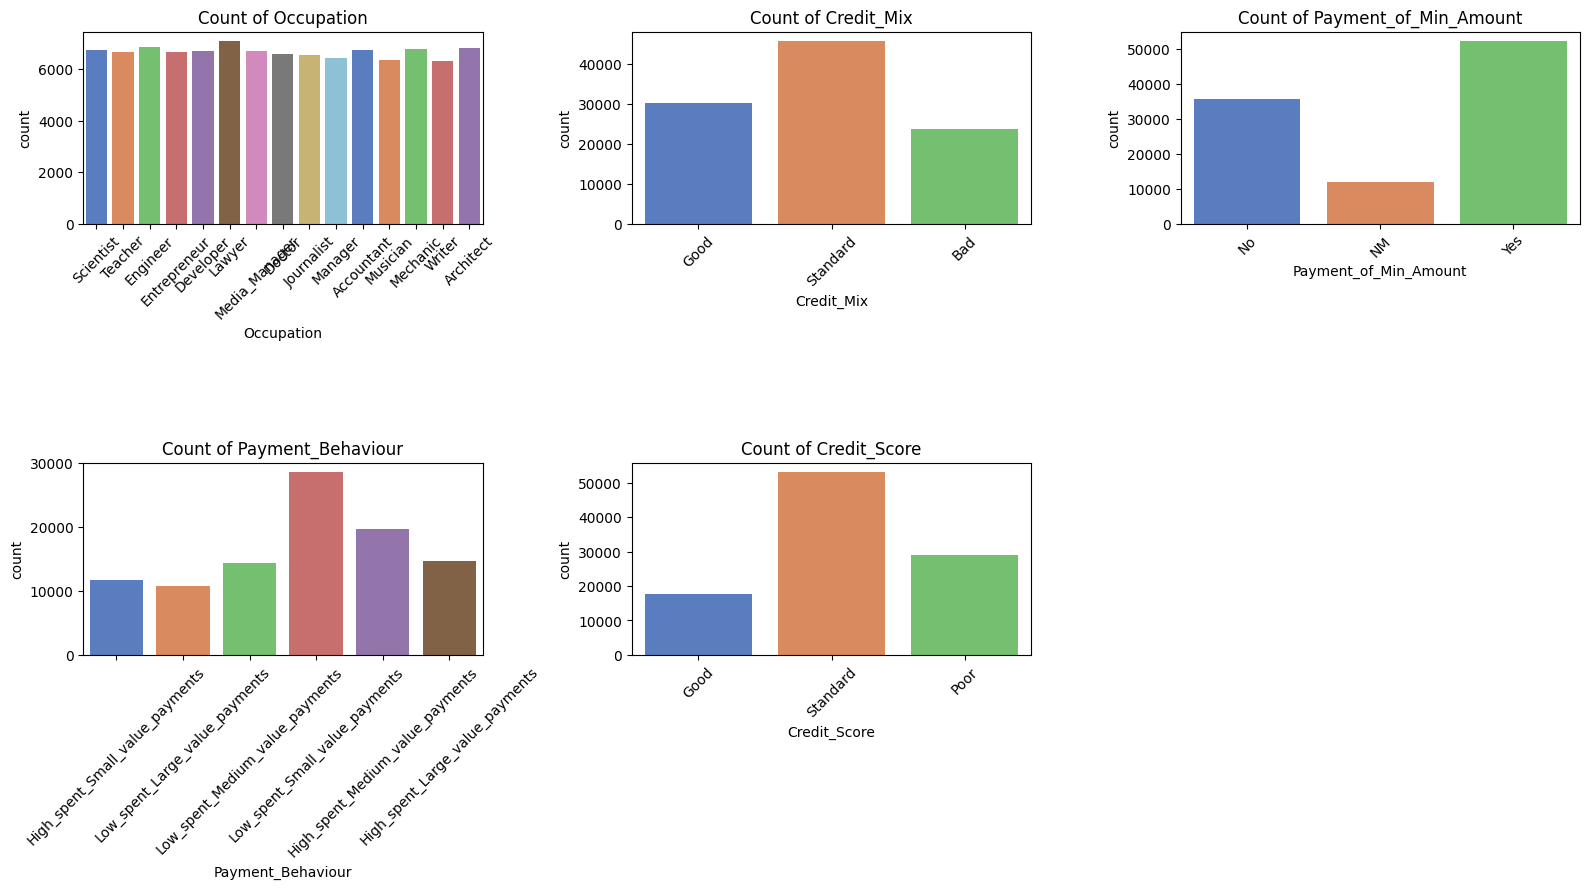

In [16]:
# List of categorical features
categorical_features = ['Occupation','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
                        'Credit_Score']

# Set up the matplotlib figure
plt.figure(figsize=(16, 24))

# Plot bar plots for categorical features
for i, feature in enumerate(categorical_features):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=data[feature],palette="muted")
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Numerical Features**

In [17]:
# Filter numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Display the numerical columns
print("Numerical Columns:")
print(numerical_columns)


Numerical Columns:
Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


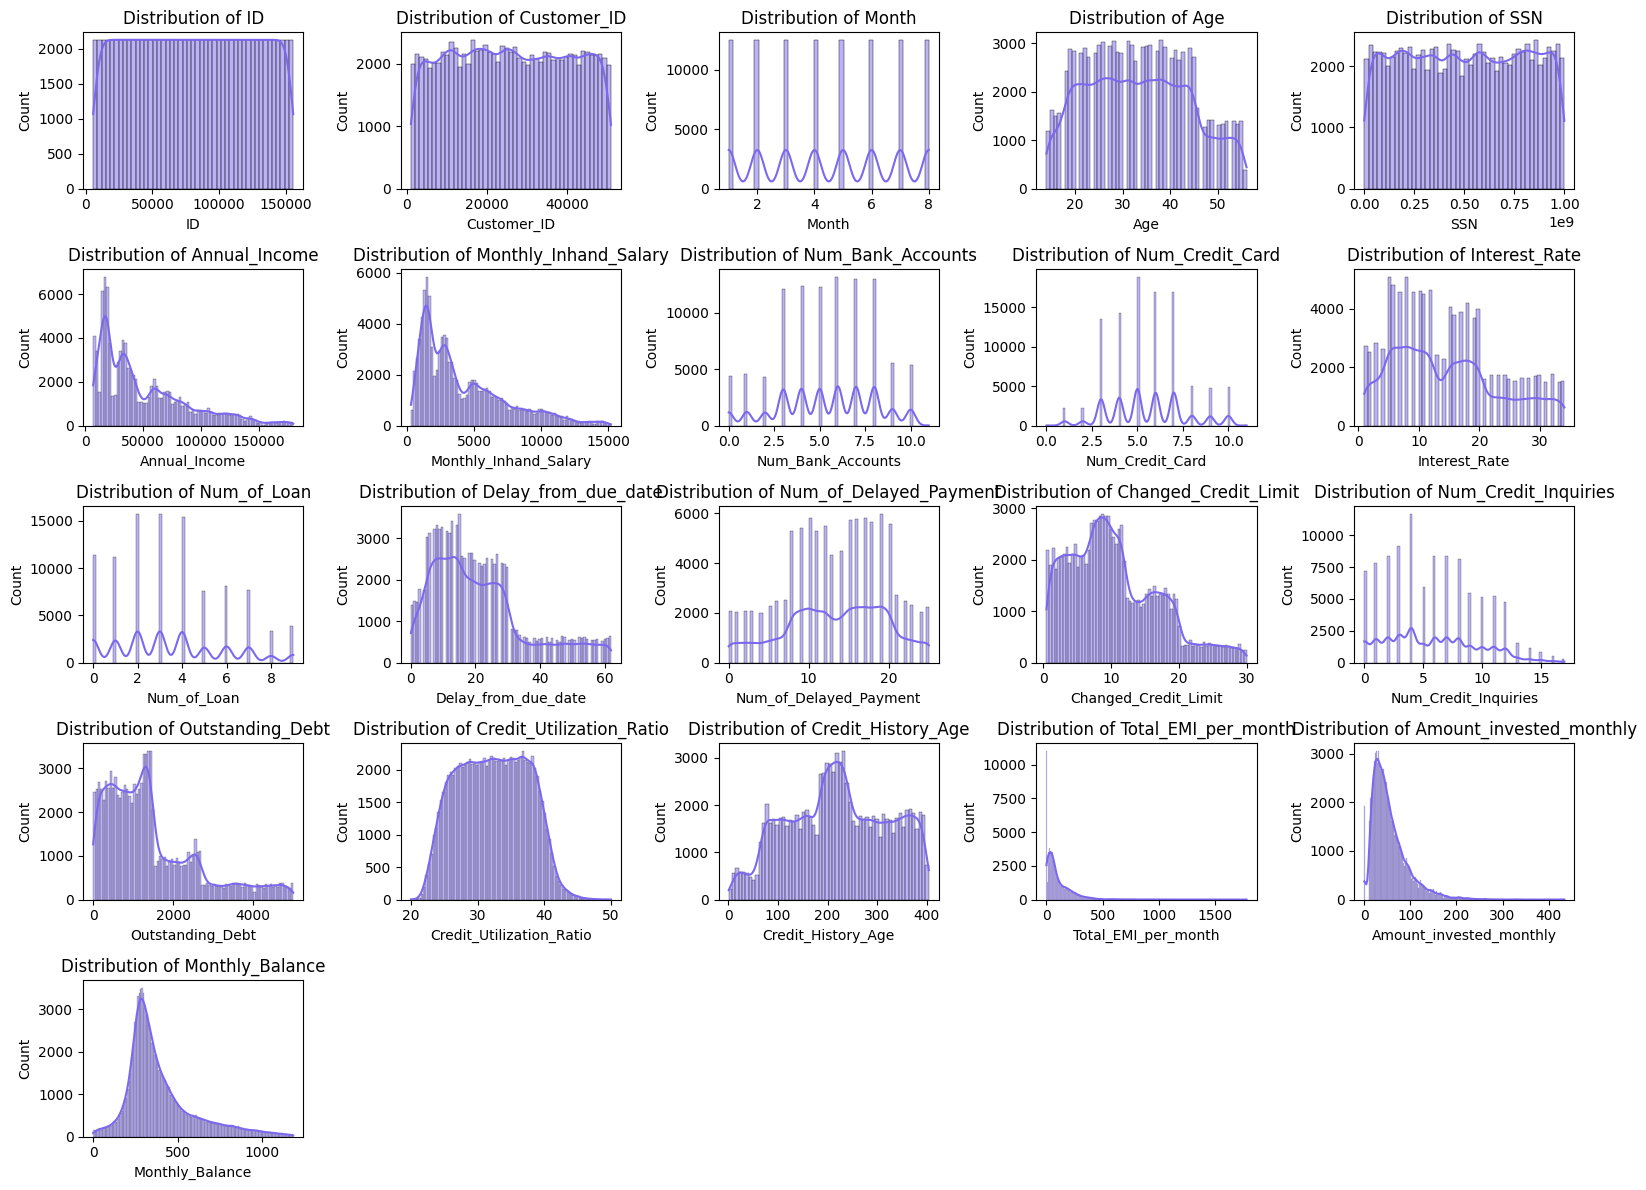

In [18]:
# List of numerical features
numerical_features = ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']


# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.histplot(data[feature], kde=True,color='mediumslateblue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


**Distribution of Age Group**

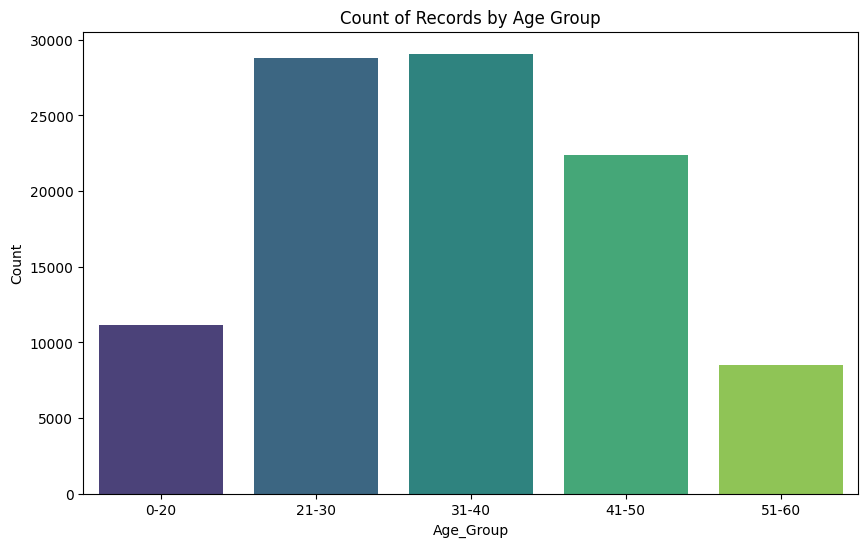

In [19]:
# Define the age bins and labels
bins = [0, 20, 30, 40, 50, 60]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60']

# Create a new column 'Age_Group' by binning the 'Age' column
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Count the number of records in each age bin
age_bin_counts = data['Age_Group'].value_counts().sort_index().reset_index()
age_bin_counts.columns = ['Age_Group', 'Count']

# Plot the count of records by age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Count', data=age_bin_counts, palette='viridis')
plt.title('Count of Records by Age Group')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.show()


###**Bivariant Analysis**

**Categorical Features**


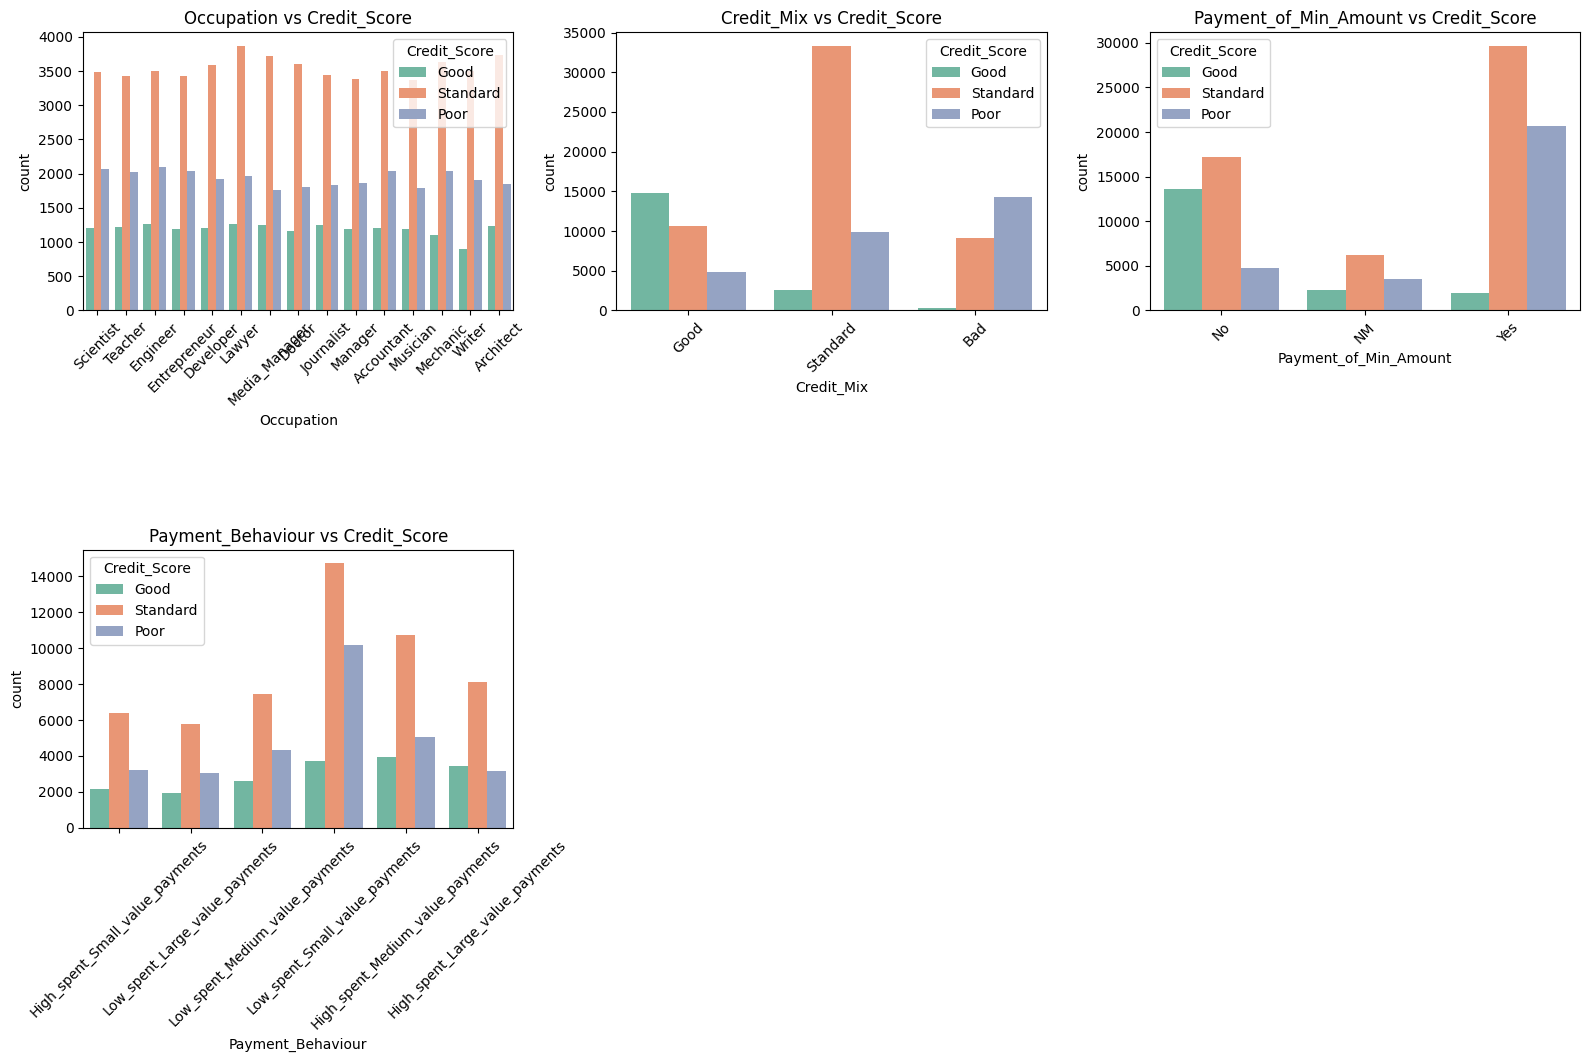

In [20]:
# List of categorical features
categorical_features = ['Occupation','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Set up the matplotlib figure
plt.figure(figsize=(16, 24))

# Plot bar plots for each categorical feature against Attrition
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=data[feature], hue=data['Credit_Score'],palette="Set2")
    plt.title(f'{feature} vs Credit_Score')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


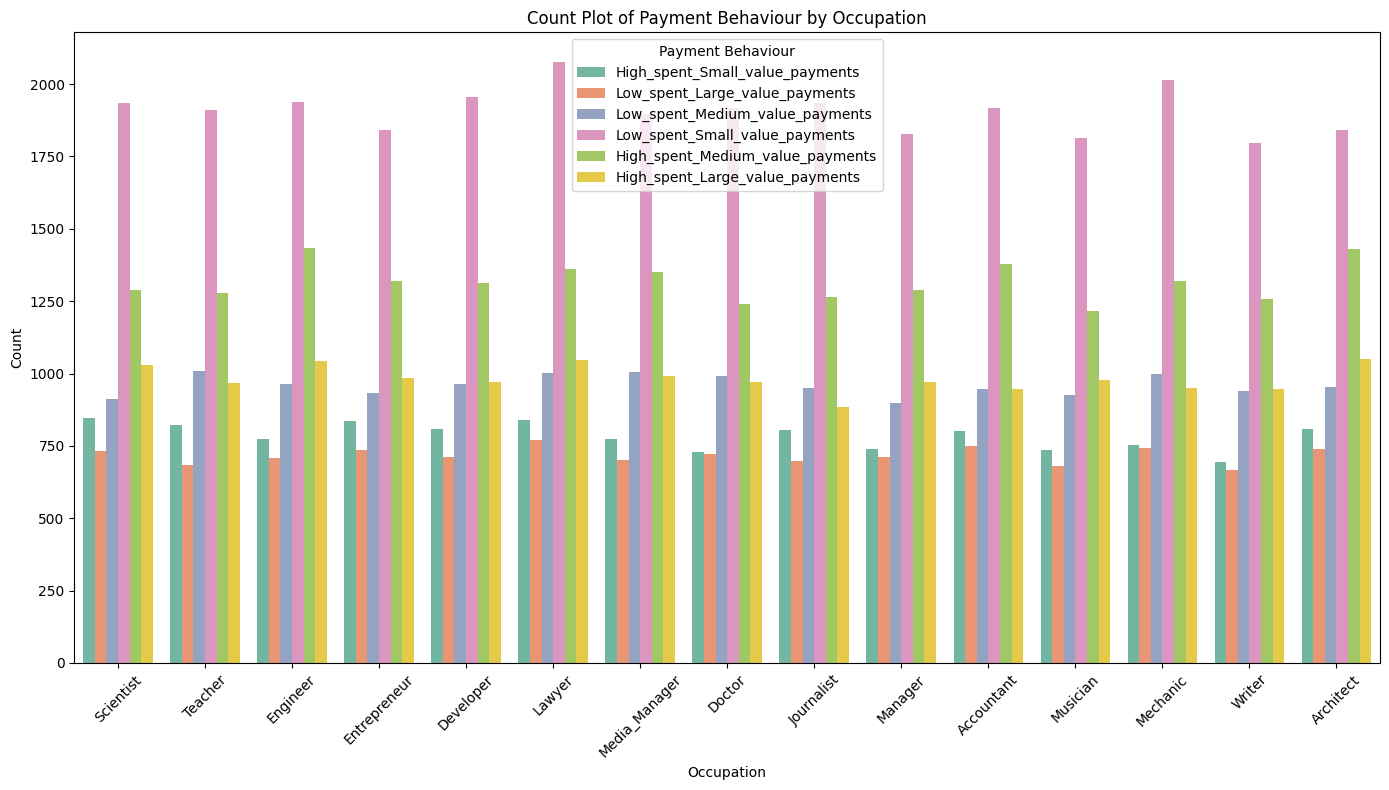

In [21]:
# Bivariate analysis for Occupation by Payment_Behaviour

# Visualization
plt.figure(figsize=(14, 8))
sns.countplot(x='Occupation', hue='Payment_Behaviour', data=data, palette='Set2')
plt.title('Count Plot of Payment Behaviour by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Behaviour')
plt.tight_layout()
plt.show()


**Numerical features**

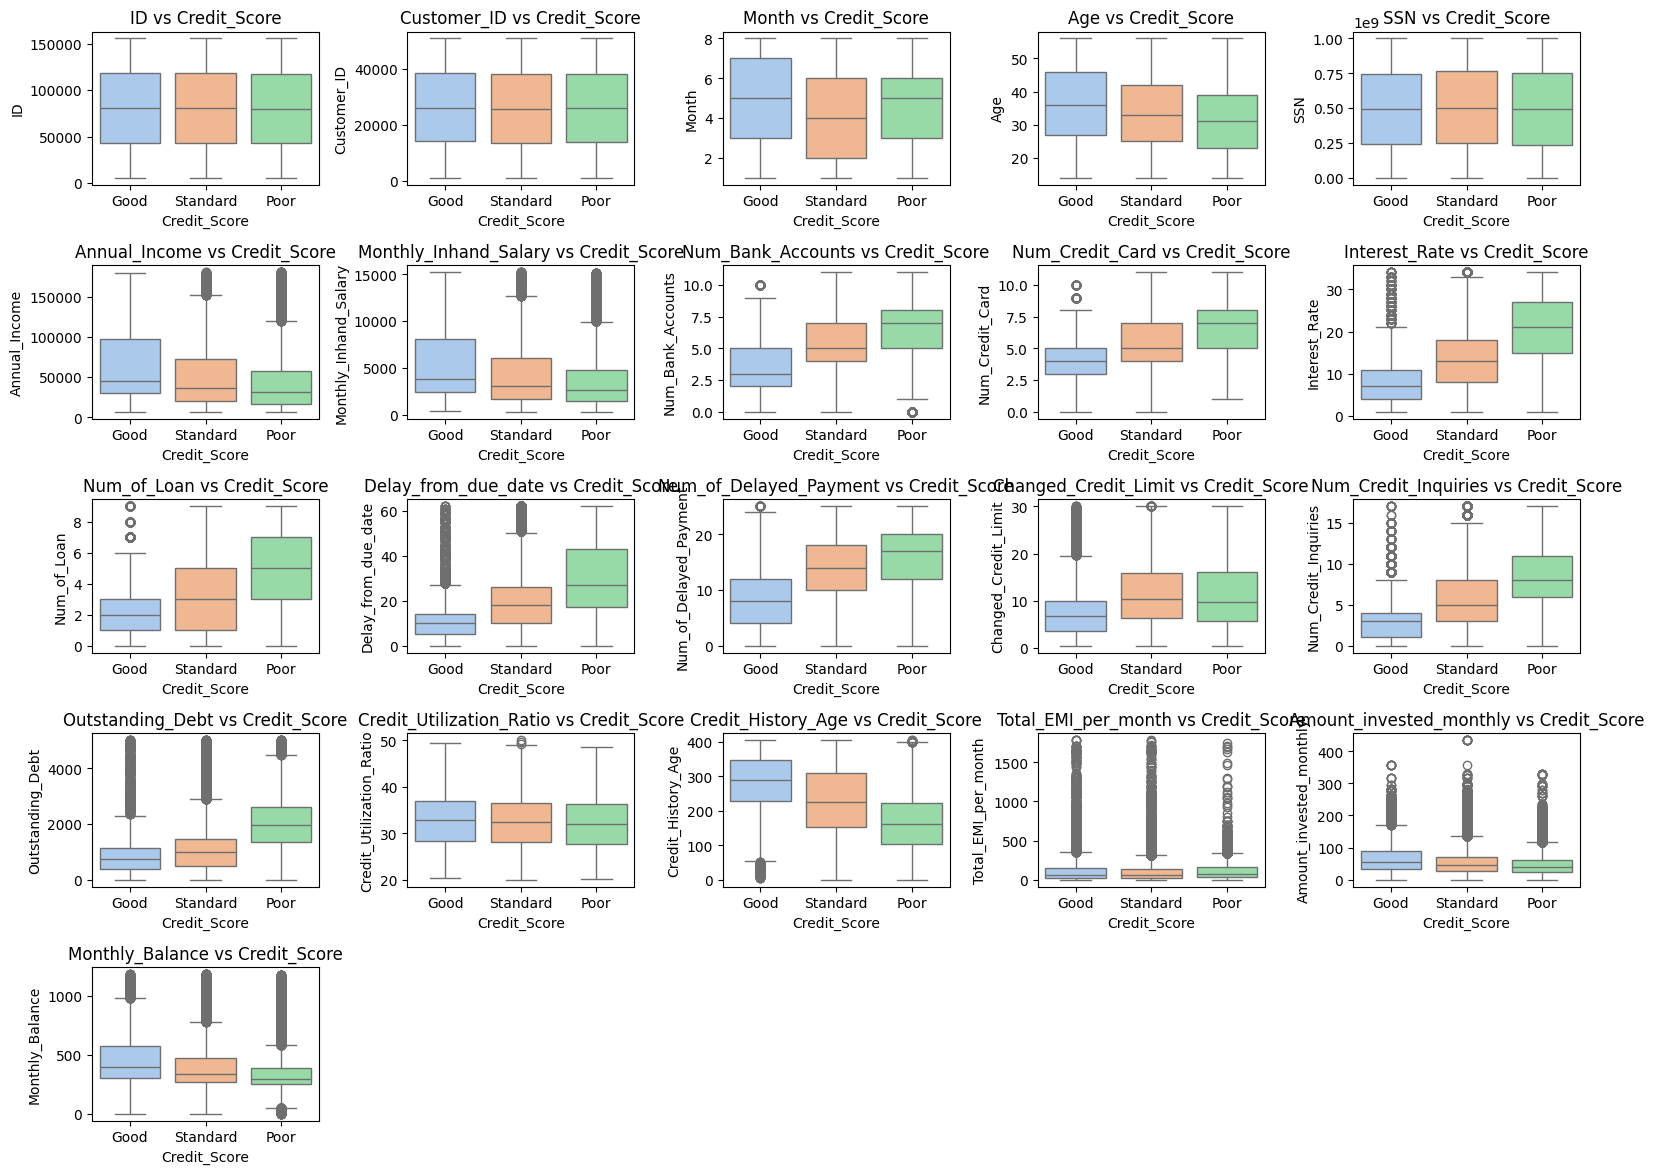

In [22]:
# List of numerical features
numerical_features = ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']


# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot box plots for each numerical feature against Attrition
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=data['Credit_Score'], y=data[feature],palette="pastel")
    plt.title(f'{feature} vs Credit_Score')

plt.tight_layout()
plt.show()


**Distribution of Average Annual Income by Age Group**

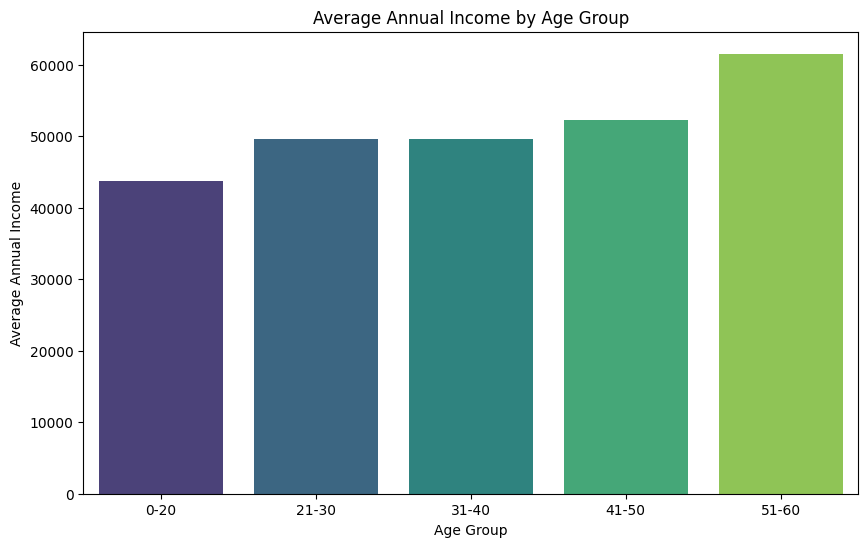

In [23]:
# Group by 'Age_Bin' and calculate the mean Annual Income for each bin
age_bin_annual_income = data.groupby('Age_Group')['Annual_Income'].mean().reset_index()

# Plot the average annual income by age bin
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Annual_Income', data=age_bin_annual_income, palette='viridis')
plt.title('Average Annual Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Income')
plt.show()


**Distribution of Average Monthly Inhand Salary by Age**

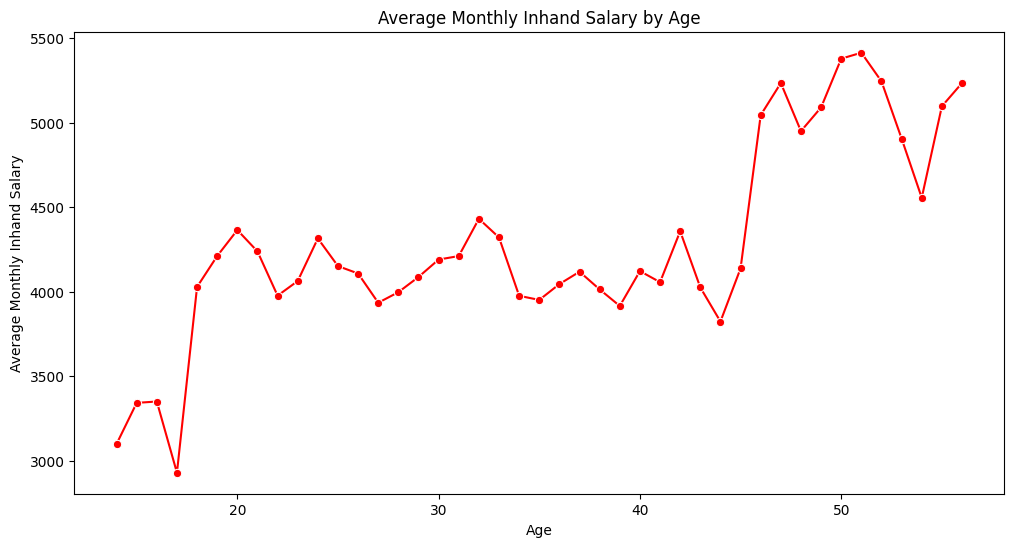

In [24]:
# Line plot to visualize the average Monthly Inhand Salary across different ages
age_salary_mean = data.groupby('Age')['Monthly_Inhand_Salary'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Monthly_Inhand_Salary', data=age_salary_mean, marker='o', color='red')
plt.title('Average Monthly Inhand Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Monthly Inhand Salary')
plt.show()


**Distribution of Number of Credit Cards by Annual Income**

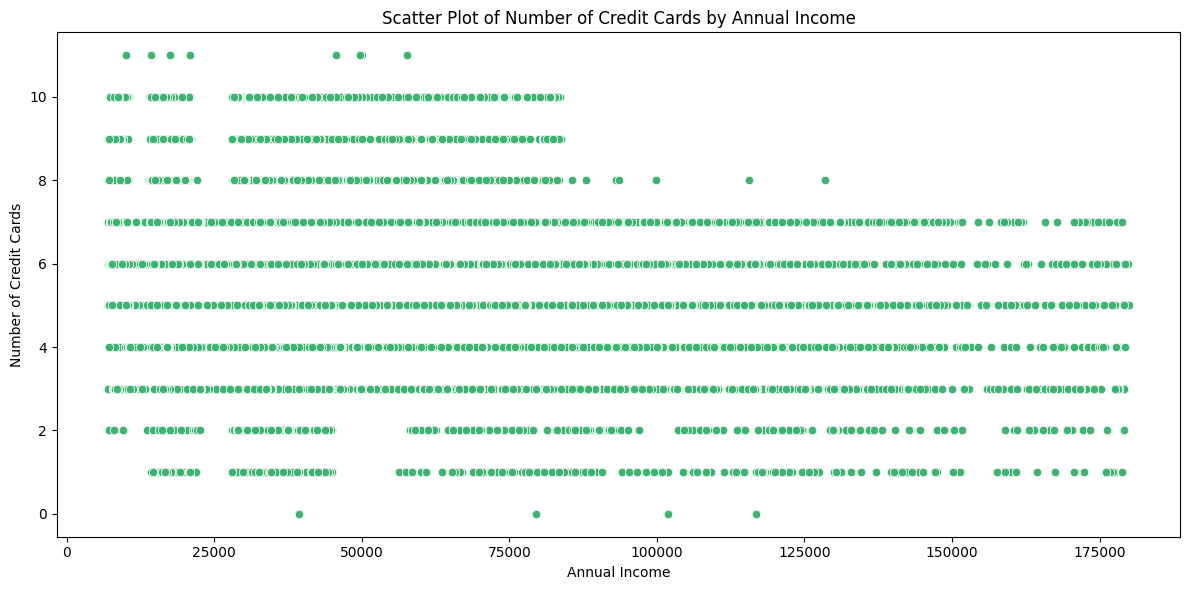

In [25]:
# Bivariate analysis for Annual_Income vs Num_Credit_Card

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Num_Credit_Card', data=data, color='mediumseagreen')
plt.title('Scatter Plot of Number of Credit Cards by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Credit Cards')
plt.tight_layout()
plt.show()


**Distribution of Delay_from_due_date by Annual Income**

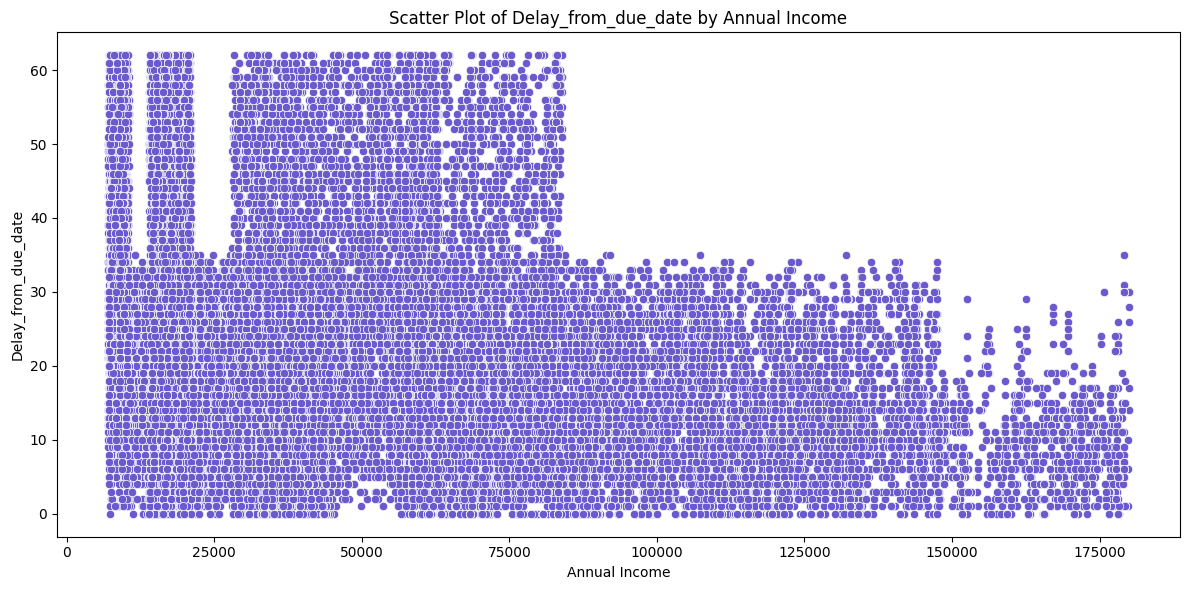

In [26]:
# Bivariate analysis for Annual_Income vs Delay_from_due_date

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Delay_from_due_date', data=data, color='slateblue')
plt.title('Scatter Plot of Delay_from_due_date by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Delay_from_due_date')
plt.tight_layout()
plt.show()


**Distribution of Num_of_Delayed_Payment by Annual Income**

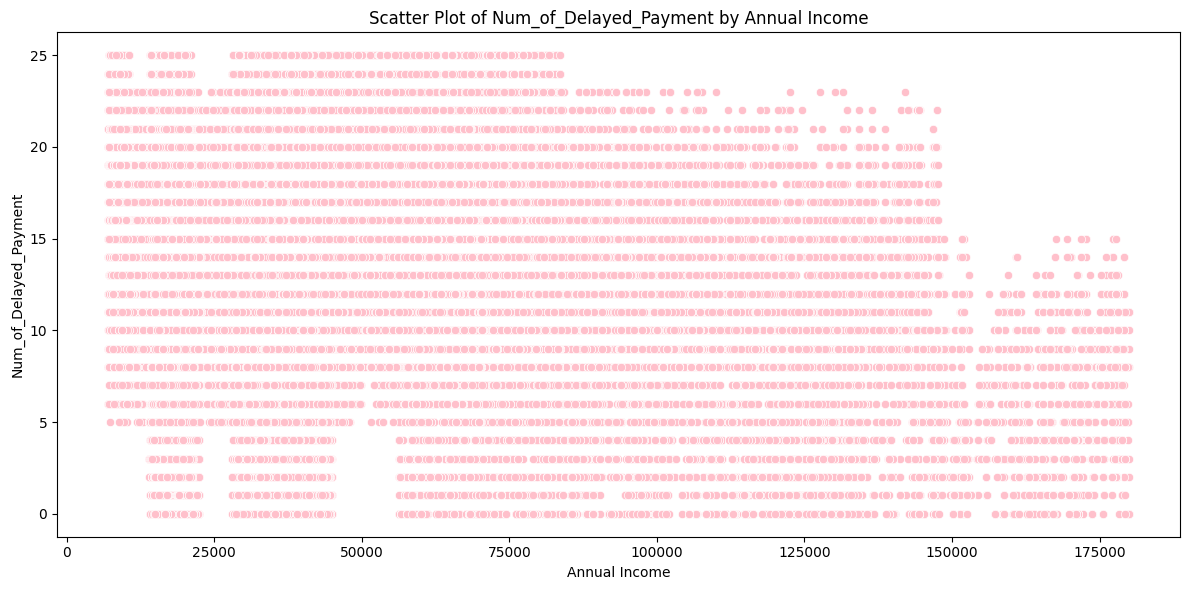

In [27]:
# Bivariate analysis for Annual_Income vs Num_of_Delayed_Payment

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Num_of_Delayed_Payment', data=data,color = 'pink')
plt.title('Scatter Plot of Num_of_Delayed_Payment by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Num_of_Delayed_Payment')
plt.tight_layout()
plt.show()


**Distribution of Outstanding_Debt by Annual Income**

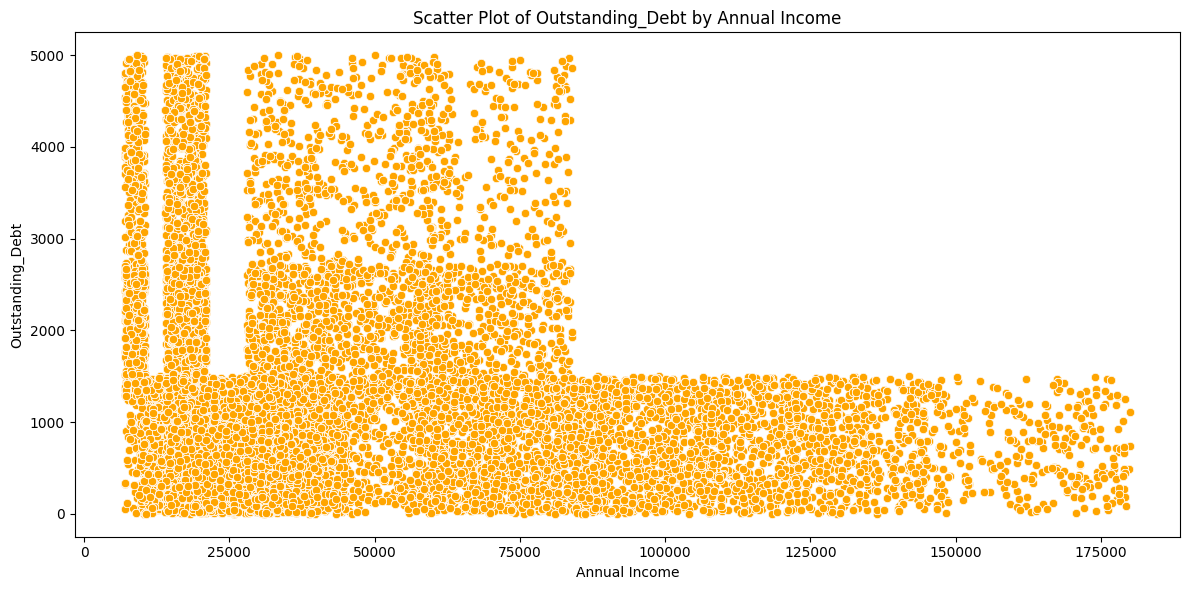

In [28]:
# Bivariate analysis for Annual_Income vs Outstanding_Debt

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', data=data,color='orange')
plt.title('Scatter Plot of Outstanding_Debt by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Outstanding_Debt')
plt.tight_layout()
plt.show()


### Inferences from the EDA

#### Numerical Features

1. **Annual Income:**
   
    Most people have lower annual incomes.The presence of high-income outliers suggests a mix of customers from different socioeconomic backgrounds. This variability can influence credit scoring models, as higher income typically correlates with better creditworthiness.

2. **Monthly Inhand Salary:**

     Consistency between annual and monthly income distributions confirms accurate reporting. Higher monthly salaries can lead to better financial stability and lower credit risk.

3. **Num Bank Accounts:**

     Majority have fewer bank accounts.Customers with more bank accounts might have better financial management skills. However, a very high number might indicate complexity in financial management.

4. **Num Credit Card:**
   
     Having more credit cards can increase credit limits but also the potential risk if not managed properly.

5. **Interest Rate:**
   
     More people associated with higher interest rates. Higher interest rates might be associated with riskier credit profiles or those with lower credit scores.

6. **Num of Loan:**

     Most individuals have fewer loans. Multiple loans can indicate financial strain or good credit management, depending on the repayment behavior.

7. **Delay from Due Date:**
   
     Payments are made closer to the due date. Frequent delays are a strong indicator of poor credit behavior and potential risk.

8. **Num of Delayed Payment:**
   
     Most people have fewer delayed payments. A high number of delayed payments is typically correlated with lower credit scores and higher risk.

9. **Changed Credit Limit:**
   
     Frequent changes in credit limits might indicate financial instability or proactive credit management by the issuer.

10. **Num Credit Inquiries:**
    
     Numerous credit inquiries can signal credit-seeking behavior, often viewed as a risk factor.

11. **Outstanding Debt**
     
     High levels of debt relative to income can indicate financial stress, which is crucial for credit risk assessment.

12. **Credit Utilization Ratio:**
    
     More individuals have higher credit utilization ratios. Higher utilization ratios negatively impact credit scores as they indicate higher reliance on credit.

13. **Credit History Age:**
    
    Longer credit histories generally suggest more reliable credit behavior and positively impact credit scores.

14. **Total EMI per Month:**
    
    Many individuals pay smaller total EMIs per month. High EMIs can indicate significant financial obligations, impacting the customer’s ability to manage additional credit.

15. **Amount Invested Monthly:**

    More individuals invest smaller amounts monthly. Regular investments suggest good financial habits and long-term financial planning.

16. **Monthly Balance:**
    
    Positive balances suggest good financial management, while negative balances indicate potential financial difficulties.

#### Categorical Features

1. **Occupation:**
   
   Certain occupations correlate with higher income and better creditworthiness, impacting credit scoring models.

2. **Credit Mix:**
   
   **Inference:** A diverse credit mix generally positively impacts credit scores, indicating well-rounded credit behavior.

3. **Payment of Min Amount:**
   
   Regularly paying only the minimum amount might indicate financial strain and can negatively impact credit scores.

4. **Payment Behaviour:**
   
   Consistent on-time payments are indicative of good credit behavior, whereas frequent delays suggest higher risk.

5. **Credit Score (Target Variable):**
   
   Understanding the distribution of credit scores helps in setting classification thresholds and evaluating model performance.

#Data Preprocessing

In [29]:
# Check for duplicates in the entire DataFrame
duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### **Missing Values**

In [30]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Age_Group                   0
dtype: int64

After observing the above, there are some columns which are not neccessary.So, We will be dropping those columns to enrich the data.



###**Drop-irrelevant columns**

In [31]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Age_Group'],
      dtype='object')

In [32]:
col = data[['Type_of_Loan', 'Name', 'ID', 'Customer_ID', 'SSN', 'Month', 'Age_Group', 'Occupation']]  # Wrap column names in quotes
for i in col:
  print(i, data[i].nunique())

Type_of_Loan 6261
Name 10128
ID 100000
Customer_ID 12500
SSN 12500
Month 8
Age_Group 5
Occupation 15


In [33]:
irrelevant_columns = [ 'ID', 'Customer_ID', 'Month', 'SSN','Type_of_Loan', 'Name','Age_Group','Occupation']
data = data.drop(columns = irrelevant_columns)

In [34]:
data.dtypes.value_counts()

float64    17
object      4
Name: count, dtype: int64

###**Outlier Detection**

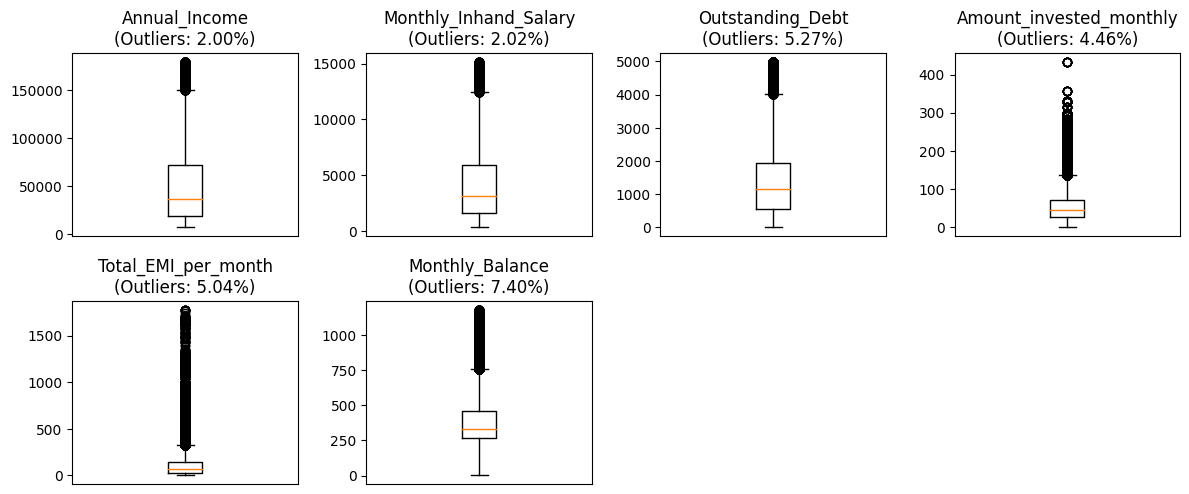

In [35]:
# List of continuous columns
continuous_columns = ['Annual_Income','Monthly_Inhand_Salary', 'Outstanding_Debt', 'Amount_invested_monthly',
                      'Total_EMI_per_month','Monthly_Balance']

# Calculate outlier percentage for each column
outlier_percentages = {}
for col in continuous_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(4, 4, i)
    plt.boxplot(data[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

###**Mapping-target column**

In [36]:
# Define the mapping
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Apply the mapping to the target column
data['Credit_Score'] = data['Credit_Score'].map(credit_score_mapping)

# Display the updated Dataset
data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,2
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,2
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,2
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,2
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,2


In [37]:
data.select_dtypes(['object']).columns

Index(['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], dtype='object')

In [38]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

### ***OrdinalEncoding***

In [39]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for ordinal encoding
credit_mix_order = ['Bad', 'Standard', 'Good']

# Initialize OrdinalEncoder with the specified order
ordinal_encoder_credit_Mix = OrdinalEncoder(categories=[credit_mix_order])

# Fit and transform the Credit_Mix column
data['Credit_Mix_Encoded'] = ordinal_encoder_credit_Mix.fit_transform(data[['Credit_Mix']])

# If you want to drop the original column
data.drop(columns=['Credit_Mix'], inplace=True)

print(data.head())


    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Outstanding_Debt  \
0                     7.0                 11.27  ...            809.98   
1               

In [40]:
# Renaming the encoded column to the original name
data.rename(columns={'Credit_Mix_Encoded': 'Credit_Mix'}, inplace=True)


In [41]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

In [42]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'data' is your DataFrame
# Define the order for the Payment_Behaviour column
payment_behaviour_order = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

# Create the OrdinalEncoder object with the specified order
ordinal_encoder_payment_behaviour = OrdinalEncoder(categories=[payment_behaviour_order])

# Fit and transform the Payment_Behaviour column
data['Payment_Behaviour_Encoded'] = ordinal_encoder_payment_behaviour.fit_transform(data[['Payment_Behaviour']])

# Display the first few rows to verify the encoding
print(data.head())


    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  \
0                     7.0                 11.27  ...   
1                     4.0                 11.27  ...

In [43]:
# If you want to drop the original column
data.drop(columns=['Payment_Behaviour'], inplace=True)


In [44]:
# Renaming the encoded column to the original name
data.rename(columns={'Payment_Behaviour_Encoded': 'Payment_Behaviour'}, inplace=True)


In [45]:
print(data.head())

    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Outstanding_Debt  \
0                     7.0                 11.27  ...            809.98   
1               

### ***One Hot Encoding***

In [46]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=['Payment_of_Min_Amount'])

# Display the DataFrame
print(data.head())


    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_History_Age  \
0                     7.0                 11.27  ...               265.0   
1           

### **Remove Highly Correlated Variables**


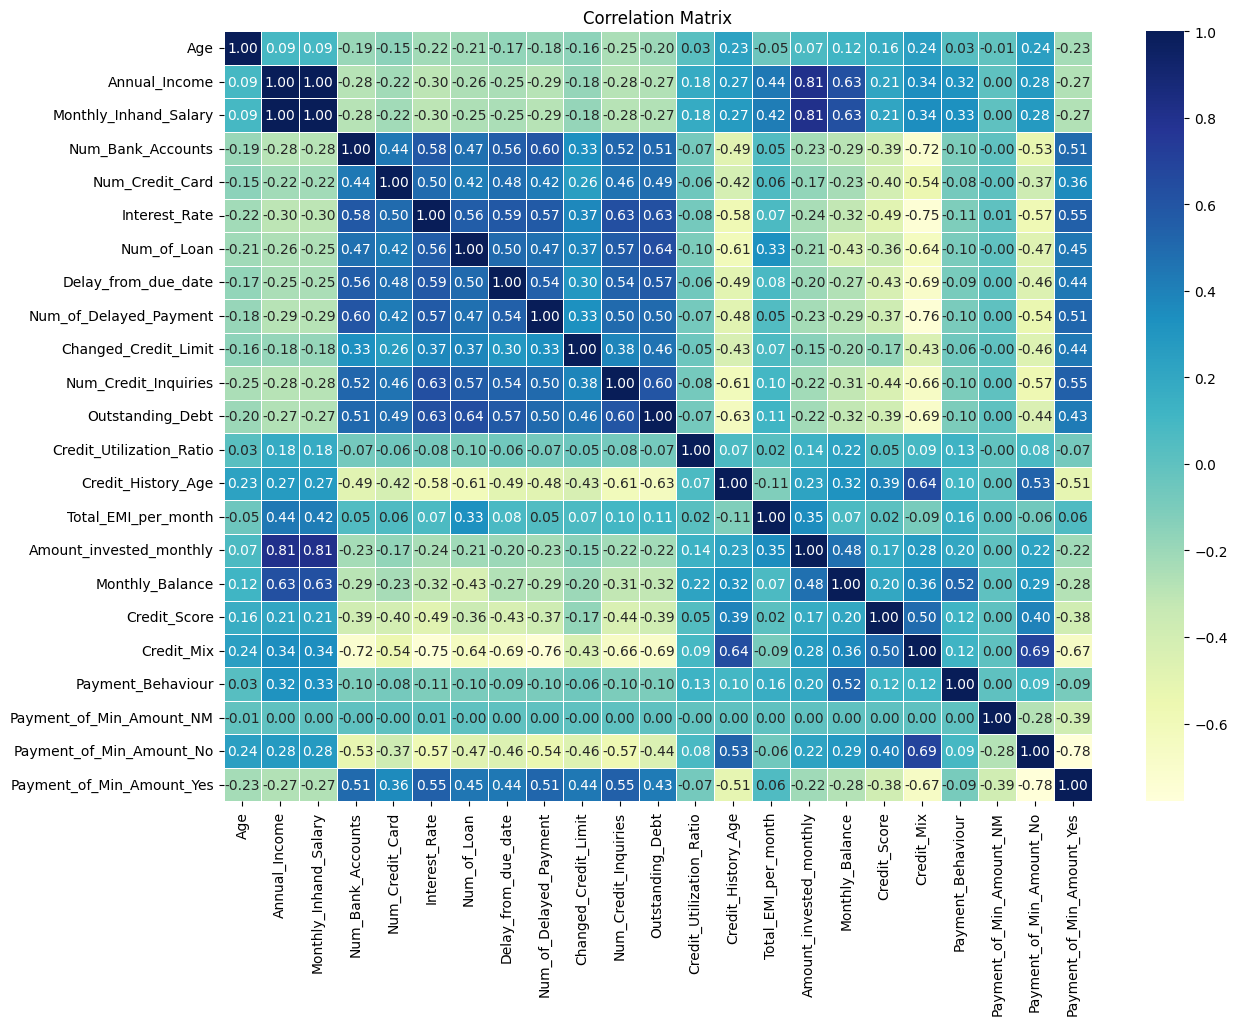

In [47]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [48]:
# Define the correlation threshold
correlation_threshold = 0.8

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 1.00
Annual_Income and Amount_invested_monthly: 0.81
Monthly_Inhand_Salary and Annual_Income: 1.00
Monthly_Inhand_Salary and Amount_invested_monthly: 0.81
Amount_invested_monthly and Annual_Income: 0.81
Amount_invested_monthly and Monthly_Inhand_Salary: 0.81


we can observe that Annual_Income and Monthly_Inhand_salary are highly coreelated, which is not good for our model, So I will be dropping Monthly_Inhand_salary as it has less relevance when compared to annual Income for a credit score classifier. Likewise,Amount_invested_monthly and Annual_Income are highly correlated,So We will be dropping Amount_invested_monthly.



In [49]:
data.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'], axis=1, inplace=True)

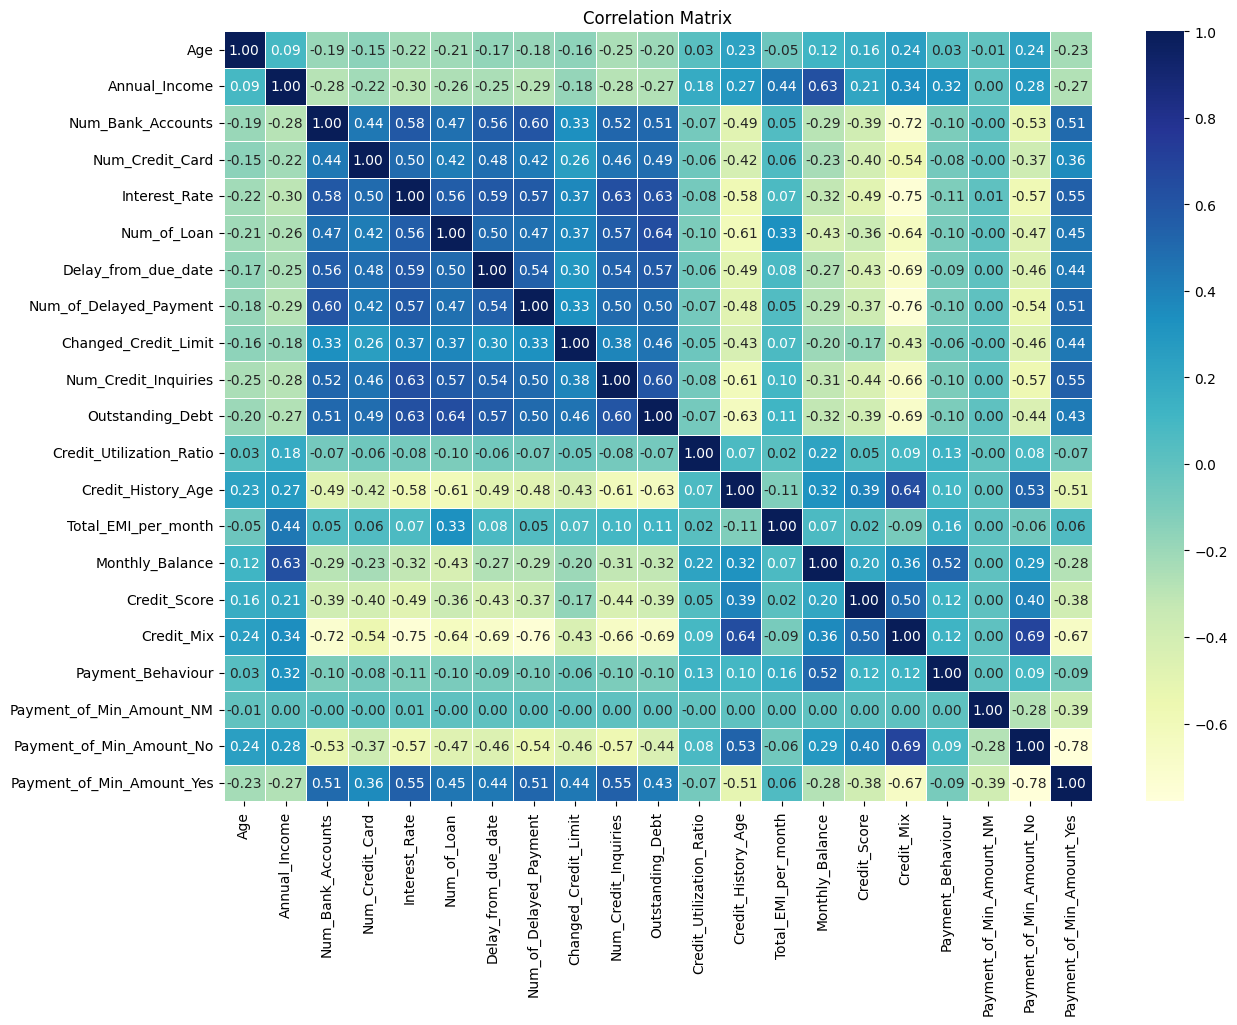

In [50]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [51]:
data.shape

(100000, 21)

#**Data Split**

In [52]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'Credit_Score' is your target column
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Step 1: Split the data into 70% training and 30% temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split the temporary set into 50% validation and 50% test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the sizes of the resulting sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')



Training set size: 70000
Validation set size: 15000
Test set size: 15000


# Feature Selection

### **Recursive Feature Elimination with Cross-Validation (RFECV)**
It aims to enhance the model's performance by selecting the most relevant features.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top k features
k = 10  # Adjust k based on the number of features you want to select
top_features = feature_importances.head(k)['Feature']

# Transform the datasets to include only the top k features
X_train_selected = X_train[top_features]
X_val_selected = X_val[top_features]
X_test_selected = X_test[top_features]

print(f'Selected features: {top_features.tolist()}')


Selected features: ['Outstanding_Debt', 'Credit_Mix', 'Credit_History_Age', 'Interest_Rate', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Monthly_Balance', 'Credit_Utilization_Ratio', 'Annual_Income', 'Total_EMI_per_month']


# **Implement Algorithm**


###**Model Selection,Training and Evaluation**


***1.Random Forest***


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report


# Initialize the model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train_selected, y_train)

# Predict on the validation set
y_val_pred = random_forest.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print('Random Forest:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_rf = accuracy_score(y_val, y_val_pred)
print("Random Forest Validation Accuracy without hyperparameter tuning:", val_accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_val, y_val_pred))


Random Forest:
  Precision: 0.7948
  Recall: 0.7946
  F1 Score: 0.7946
Random Forest Validation Accuracy without hyperparameter tuning: 0.7946
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4438
           1       0.82      0.80      0.81      7927
           2       0.74      0.74      0.74      2635

    accuracy                           0.79     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.79      0.79      0.79     15000



###***Cross-Validation-RF***

In [56]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores = cross_val_score(random_forest, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.79185714 0.78378571 0.78792857 0.78257143 0.78542857]
Mean CV Score: 0.7863142857142857


###***Performance Validation -Testing dataset-RF***

In [57]:
# Now predict using the modified test set
y_test_pred = random_forest.predict(X_test_selected)

test_accuracy_rf = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("RF PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("RF testing Accuracy",test_accuracy_rf)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


RF PERFORMANCE VALIDATION:
Precision:  0.7997083242446833
Recall:  0.7994666666666667
F1 Score:  0.799504182483894
RF testing Accuracy 0.7994666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      4367
           1       0.82      0.81      0.81      7946
           2       0.75      0.75      0.75      2687

    accuracy                           0.80     15000
   macro avg       0.79      0.79      0.79     15000
weighted avg       0.80      0.80      0.80     15000



###***Hyperparameter Tuning using RandomizedSearchCV-RF***


In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a more constrained parameter grid
param_dist = {
    'n_estimators': [100, 150],  # Narrower range
    'max_depth': [10, 15, 20],  # Narrower range
    'min_samples_split': [2, 3, 4],  # Narrower range
    'min_samples_leaf': [1, 2],  # Narrower range
    'max_features': ['sqrt'],  # Single option
    'criterion': ['gini']  # Single option
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object with fewer iterations
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model on the training data
random_search_rf.fit(X_train_selected, y_train)

# Get the best parameters
print("Best Parameters:", random_search_rf.best_params_)

# Make predictions on the validation data
y_pred = random_search_rf.best_estimator_.predict(X_val_selected)

print("\nRandom Forest Validation Accuracy with hyperparameter tuning")
accuracy_rf_tuned = accuracy_score(y_val, y_pred)
print(accuracy_rf_tuned)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}

Random Forest Validation Accuracy with hyperparameter tuning
0.7776


In [93]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print('Tuned RF Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

print("RF Classification Report:")
print(classification_report(y_val, y_pred))


Tuned RF Classifier:
  Precision: 0.7821
  Recall: 0.7776
  F1 Score: 0.7789
RF Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      4438
           1       0.82      0.78      0.80      7927
           2       0.66      0.77      0.71      2635

    accuracy                           0.78     15000
   macro avg       0.76      0.78      0.76     15000
weighted avg       0.78      0.78      0.78     15000



***Cross-Validation-RF-TUNING***

In [79]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores = cross_val_score(random_search_rf, X_train_selected, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Cross-Validation Scores: [0.78092055 0.77932542 0.77658252]
Mean CV Score: 0.7789428288897681


***Performance Validation -Testing dataset-RF TUNING***

In [94]:
# Now predict using the modified test set
y_test_pred = random_search_rf.predict(X_test_selected)

test_accuracy_rf_tuning = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("RF PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("RF testing Accuracy",test_accuracy_rf_tuning)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


RF PERFORMANCE VALIDATION:
Precision:  0.7901762471435356
Recall:  0.7848
F1 Score:  0.7861904417655438
RF testing Accuracy 0.7848
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      4367
           1       0.83      0.78      0.81      7946
           2       0.67      0.79      0.72      2687

    accuracy                           0.78     15000
   macro avg       0.76      0.79      0.77     15000
weighted avg       0.79      0.78      0.79     15000



***2.Gradient Boosting***


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_selected, y_train)

# Predict on validation set
y_val_pred_gb = gb.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_gb, average='weighted')
recall = recall_score(y_val, y_val_pred_gb, average='weighted')
f1 = f1_score(y_val, y_val_pred_gb, average='weighted')

print('Gradient Boosting Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
print("Gradient Boosting Validation Accuracy without Hyperparameter tuning:", val_accuracy_gb)
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, y_val_pred_gb))


Gradient Boosting Classifier:
  Precision: 0.7129
  Recall: 0.6918
  F1 Score: 0.6962
Gradient Boosting Validation Accuracy without Hyperparameter tuning: 0.6918
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      4438
           1       0.78      0.69      0.73      7927
           2       0.51      0.77      0.62      2635

    accuracy                           0.69     15000
   macro avg       0.67      0.70      0.68     15000
weighted avg       0.71      0.69      0.70     15000



***Cross-Validation-Gradient Boosting***

In [59]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores = cross_val_score(gb, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.7085     0.70107143 0.70407143 0.70135714 0.70128571]
Mean CV Score: 0.7032571428571428


***Performance Validation -Testing dataset-Gradient Boosting***

In [60]:
# Now predict using the modified test set
y_test_pred = gb.predict(X_test_selected)

test_accuracy_gb = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("GB PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("GB testing Accuracy",test_accuracy_gb)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


GB PERFORMANCE VALIDATION:
Precision:  0.7238413068656184
Recall:  0.7048
F1 Score:  0.7084504565232363
GB testing Accuracy 0.7048
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.65      0.69      4367
           1       0.79      0.71      0.74      7946
           2       0.54      0.78      0.64      2687

    accuracy                           0.70     15000
   macro avg       0.68      0.71      0.69     15000
weighted avg       0.72      0.70      0.71     15000



***Tuning Hyperparameters-Gradient Boosting***

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define the parameter distributions
param_distributions = {
    'n_estimators': randint(50, 100),        # Reduced upper bound
    'learning_rate': uniform(0.05, 0.05),    # Narrower range
    'max_depth': randint(3, 4),              # Narrower range
    'min_samples_split': randint(2, 3),      # Narrower range
    'min_samples_leaf': randint(1, 2),       # Narrower range
    'subsample': uniform(0.9, 0.05),         # Narrower range
    'max_features': ['auto', 'sqrt', 'log2'] # Categorical choices
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=5,          # Reduced number of iterations
    cv=3,              # Reduced number of cross-validation folds
    n_jobs=-1,         # Use all available cores
    verbose=2,
    random_state=42
)

# Fit the model on the training data
random_search.fit(X_train_selected, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Make predictions on the testing data
y_pred_tuned = random_search.best_estimator_.predict(X_val_selected)

# Calculate the accuracy score
accuracy_tuned_gb = accuracy_score(y_val, y_pred_tuned)
print("Gradient Boosting Accuracy Score with hyperparameter tuning:", accuracy_tuned_gb)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.07296244459829336, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 85, 'subsample': 0.907143340896097}
Gradient Boosting Accuracy Score with hyperparameter tuning: 0.6895333333333333


In [85]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred_tuned, average='weighted')
recall = recall_score(y_val, y_pred_tuned, average='weighted')
f1 = f1_score(y_val, y_pred_tuned, average='weighted')

print('Tuned GB Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

print("GB Classification Report:")
print(classification_report(y_val, y_pred))


Tuned GB Classifier:
  Precision: 0.7122
  Recall: 0.6895
  F1 Score: 0.6942
GB Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      4438
           1       0.76      0.76      0.76      7927
           2       0.62      0.66      0.64      2635

    accuracy                           0.73     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.73      0.73      0.73     15000



***3.Decision Tree***


In [63]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train)

# Predict on validation set
y_val_pred_dt = dt.predict(X_val_selected)


# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_dt, average='weighted')
recall = recall_score(y_val, y_val_pred_dt, average='weighted')
f1 = f1_score(y_val, y_val_pred_dt, average='weighted')

print('Decision Tree Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print("Decision Tree Validation Accuracy without Hyperparameter tuning:", val_accuracy_dt)
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_val_pred_dt))


Decision Tree Classifier:
  Precision: 0.7237
  Recall: 0.7243
  F1 Score: 0.7239
Decision Tree Validation Accuracy without Hyperparameter tuning: 0.7242666666666666
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4438
           1       0.75      0.76      0.75      7927
           2       0.66      0.64      0.65      2635

    accuracy                           0.72     15000
   macro avg       0.71      0.70      0.71     15000
weighted avg       0.72      0.72      0.72     15000



***Cross-Validation-Decision Tree***

In [64]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores = cross_val_score(dt, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.71014286 0.71335714 0.711      0.71164286 0.71528571]
Mean CV Score: 0.7122857142857143


***Performance Validation -Testing dataset-Decision Tree***

In [65]:
# Now predict using the modified test set
y_test_pred = dt.predict(X_test_selected)

test_accuracy_dt = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("DT PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("DT testing Accuracy",test_accuracy_dt)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


DT PERFORMANCE VALIDATION:
Precision:  0.7299356241598876
Recall:  0.7302666666666666
F1 Score:  0.730045343046784
DT testing Accuracy 0.7302666666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      4367
           1       0.75      0.77      0.76      7946
           2       0.67      0.66      0.67      2687

    accuracy                           0.73     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.73      0.73      0.73     15000



***Tuning Hyperparameters-DT***

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the reduced parameter grid
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': [None, 'sqrt']
}

# Create a GridSearchCV object with reduced number of folds
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the validation data
y_pred = grid_search.best_estimator_.predict(X_val_selected)

print("\nDecision Tree Accuracy Score with Hyperparameter Tuning:")
accuracy_dt_tuned = accuracy_score(y_val, y_pred)
print(accuracy_dt_tuned)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Accuracy Score with Hyperparameter Tuning:
0.7298


In [86]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print('Tuned DT Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

print("DT Classification Report:")
print(classification_report(y_val, y_pred))


Tuned DT Classifier:
  Precision: 0.7315
  Recall: 0.7298
  F1 Score: 0.7305
DT Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      4438
           1       0.76      0.76      0.76      7927
           2       0.62      0.66      0.64      2635

    accuracy                           0.73     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.73      0.73      0.73     15000



***4.Naive Bayes***


In [66]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb = GaussianNB()
nb.fit(X_train_selected, y_train)

# Predict on validation set
y_val_pred_nb = nb.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_nb, average='weighted')
recall = recall_score(y_val, y_val_pred_nb, average='weighted')
f1 = f1_score(y_val, y_val_pred_nb, average='weighted')

print('Naive Bayes Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_nb = accuracy_score(y_val, y_val_pred_nb)
print("Naive Bayes Validation Accuracy without Hyperparameter tuning:", val_accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_val_pred_nb))


Naive Bayes Classifier:
  Precision: 0.6654
  Recall: 0.5989
  F1 Score: 0.6027
Naive Bayes Validation Accuracy without Hyperparameter tuning: 0.5988666666666667
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      4438
           1       0.77      0.48      0.59      7927
           2       0.41      0.82      0.54      2635

    accuracy                           0.60     15000
   macro avg       0.60      0.66      0.60     15000
weighted avg       0.67      0.60      0.60     15000



***Cross-Validation-Naive Bayes***

In [67]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores = cross_val_score(nb, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.60364286 0.59585714 0.60642857 0.60707143 0.60778571]
Mean CV Score: 0.6041571428571428


***Performance Validation -Testing dataset-Naive Bayes***

In [68]:
# Now predict using the modified test set
y_test_pred = nb.predict(X_test_selected)

test_accuracy_nb = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("NB PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("NB testing Accuracy",test_accuracy_nb)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


NB PERFORMANCE VALIDATION:
Precision:  0.6693809920305833
Recall:  0.6044
F1 Score:  0.6068334737941377
NB testing Accuracy 0.6044
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.68      0.66      4367
           1       0.77      0.48      0.60      7946
           2       0.42      0.83      0.56      2687

    accuracy                           0.60     15000
   macro avg       0.61      0.67      0.60     15000
weighted avg       0.67      0.60      0.61     15000



***Hyperparameter Tuning-Naive Bayes***

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the validation data
y_val_pred_nb_tuned = grid_search.best_estimator_.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_nb_tuned, average='weighted')
recall = recall_score(y_val, y_val_pred_nb_tuned, average='weighted')
f1 = f1_score(y_val, y_val_pred_nb_tuned, average='weighted')

print('Tuned Naive Bayes Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_nb_tuned = accuracy_score(y_val, y_val_pred_nb_tuned)
print("Naive Bayes Validation Accuracy with Hyperparameter tuning:", val_accuracy_nb_tuned)
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_val_pred_nb_tuned))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'var_smoothing': 1e-09}
Tuned Naive Bayes Classifier:
  Precision: 0.6654
  Recall: 0.5989
  F1 Score: 0.6027
Naive Bayes Validation Accuracy with Hyperparameter tuning: 0.5988666666666667
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      4438
           1       0.77      0.48      0.59      7927
           2       0.41      0.82      0.54      2635

    accuracy                           0.60     15000
   macro avg       0.60      0.66      0.60     15000
weighted avg       0.67      0.60      0.60     15000



***5.XGBoost***


In [69]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Predict on validation set
y_val_pred_xgb = xgb_model.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_xgb, average='weighted')
recall = recall_score(y_val, y_val_pred_xgb, average='weighted')
f1 = f1_score(y_val, y_val_pred_xgb, average='weighted')

print('XGBoost Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print("XGBoost Validation Accuracy without Hyperparameter tuning:", val_accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_val, y_val_pred_xgb))



XGBoost Classifier:
  Precision: 0.7553
  Recall: 0.7502
  F1 Score: 0.7517
XGBoost Validation Accuracy without Hyperparameter tuning: 0.7502
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4438
           1       0.80      0.76      0.78      7927
           2       0.63      0.74      0.68      2635

    accuracy                           0.75     15000
   macro avg       0.73      0.75      0.73     15000
weighted avg       0.76      0.75      0.75     15000



***Cross-Validation-XGBoost***

In [71]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores = cross_val_score(xgb_model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.751      0.74907143 0.74771429 0.749      0.74978571]
Mean CV Score: 0.7493142857142858


***Performance Validation -Testing dataset-XGBoost***

In [72]:
# Now predict using the modified test set
y_test_pred = xgb_model.predict(X_test_selected)

test_accuracy_xgb = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("XGB PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("XGB testing Accuracy",test_accuracy_xgb)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


XGB PERFORMANCE VALIDATION:
Precision:  0.761816075210909
Recall:  0.7571333333333333
F1 Score:  0.7583057981621542
XGB testing Accuracy 0.7571333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      4367
           1       0.80      0.77      0.78      7946
           2       0.65      0.76      0.70      2687

    accuracy                           0.76     15000
   macro avg       0.74      0.75      0.74     15000
weighted avg       0.76      0.76      0.76     15000



***Hyperparameter Tuning-XGBoost***

In [90]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from scipy.stats import randint, uniform

# Define a more constrained parameter grid
param_dist = {
    'n_estimators': randint(50, 100),  # Reduced range
    'learning_rate': uniform(0.05, 0.1),  # Narrower range
    'max_depth': randint(3, 6),  # Reduced range
    'min_child_weight': randint(1, 3),  # Reduced range
    'subsample': uniform(0.7, 0.3),  # Narrower range
    'colsample_bytree': uniform(0.7, 0.3),  # Narrower range
    'gamma': uniform(0, 0.1)  # Narrower range
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Create a RandomizedSearchCV object with fewer iterations
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model on the training data
random_search_xgb.fit(X_train_selected, y_train)

# Get the best parameters
print("Best Parameters:", random_search_xgb.best_params_)

# Make predictions on the validation data
y_val_pred_xgb_tuned = random_search_xgb.best_estimator_.predict(X_val_selected)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_xgb_tuned, average='weighted')
recall = recall_score(y_val, y_val_pred_xgb_tuned, average='weighted')
f1 = f1_score(y_val, y_val_pred_xgb_tuned, average='weighted')

print('Tuned XGBoost Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_xgb_tuned = accuracy_score(y_val, y_val_pred_xgb_tuned)
print("XGBoost Validation Accuracy with Hyperparameter tuning:", val_accuracy_xgb_tuned)
print("XGBoost Classification Report:")
print(classification_report(y_val, y_val_pred_xgb_tuned))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'colsample_bytree': 0.794306794322898, 'gamma': 0.05085706911647028, 'learning_rate': 0.1407566473926093, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 94, 'subsample': 0.8619523273905019}
Tuned XGBoost Classifier:
  Precision: 0.7266
  Recall: 0.7097
  F1 Score: 0.7134
XGBoost Validation Accuracy with Hyperparameter tuning: 0.7096666666666667
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      4438
           1       0.79      0.71      0.75      7927
           2       0.54      0.76      0.63      2635

    accuracy                           0.71     15000
   macro avg       0.69      0.72      0.69     15000
weighted avg       0.73      0.71      0.71     15000



In [77]:
# Create a dictionary with model names as keys and accuracies as values
accuracy_dict = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Naive Bayes', 'XGBoost'],
    'Validation Accuracy': [val_accuracy_rf, val_accuracy_gb, val_accuracy_dt, val_accuracy_nb, val_accuracy_xgb]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_dict)

# Sort the DataFrame by 'Validation Accuracy' in descending order
accuracy_sorted = accuracy_df.sort_values(by='Validation Accuracy', ascending=False)

# Display the sorted DataFrame
print(accuracy_sorted)



               Model  Validation Accuracy
0      Random Forest             0.794600
4            XGBoost             0.750200
2      Decision Tree             0.724267
1  Gradient Boosting             0.691800
3        Naive Bayes             0.598867


  **Random Forest without hyperparameter tuning exhibit higher accuracy, it can be concluded that Random Forest is the best model.**


###***Model Interpretability***

                     Feature  Importance
10          Outstanding_Debt    0.167340
12        Credit_History_Age    0.113701
15                Credit_Mix    0.106082
4              Interest_Rate    0.096626
8       Changed_Credit_Limit    0.093180
14           Monthly_Balance    0.089963
6        Delay_from_due_date    0.089541
11  Credit_Utilization_Ratio    0.087286
1              Annual_Income    0.079870
13       Total_EMI_per_month    0.076412


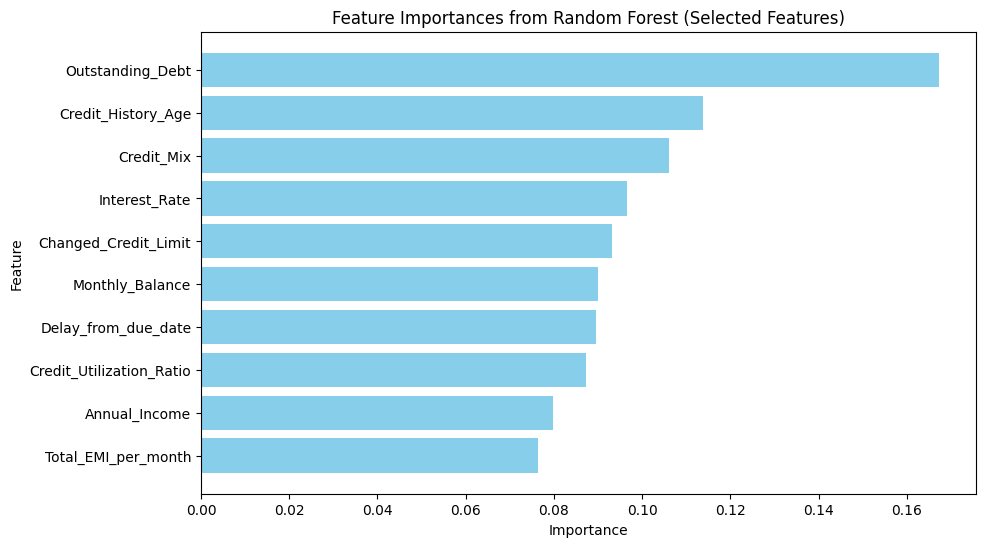

In [61]:
# Train the Random Forest model using the selected features
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_selected, y_train)

# Get feature importances
importances = random_forest.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': top_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest (Selected Features)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


###***Threshold Selection***

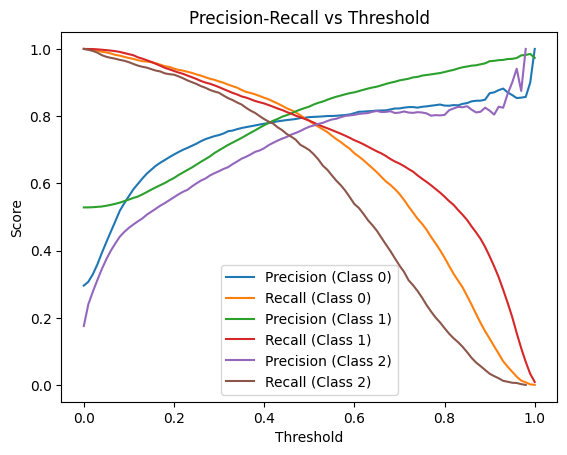

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      4438
           1       0.83      0.79      0.81      7927
           2       0.77      0.70      0.73      2635

    accuracy                           0.79     15000
   macro avg       0.78      0.78      0.77     15000
weighted avg       0.79      0.79      0.79     15000



In [62]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Assuming y_val is multiclass, binarize it
y_val_binarized = label_binarize(y_val, classes=np.unique(y_val))

# Iterate over each class and calculate precision-recall curve
for i in range(y_val_binarized.shape[1]):
    y_scores_class = random_forest.predict_proba(X_val_selected)[:, i]
    precision, recall, thresholds = precision_recall_curve(y_val_binarized[:, i], y_scores_class)

    # Plot precision-recall curve for the current class
    plt.plot(thresholds, precision[:-1], label=f'Precision (Class {i})')
    plt.plot(thresholds, recall[:-1], label=f'Recall (Class {i})')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()

# Select a threshold (example)
selected_threshold = 0.5
y_val_pred_threshold = (random_forest.predict_proba(X_val_selected) >= selected_threshold).astype(int)

# For multiclass classification, consider using other metrics like:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred_threshold.argmax(axis=1)))